GOLD PRICE PREDICTION 
Kelompok 1 :
1. Zaki Ahmad Basyary
2. Alih Bangun Wicaksono
3. Leo Fetri Hendli
4. Ahmad Mauluddin

Importing the Libraries

In [2]:
# Install library seaborn
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# install library sciklearn
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib 

Data Collection and Processing

In [4]:
# Mengambil data pada file gld_prce_data.csv
gold_data = pd.read_csv('gld_price_data.csv')

File "gld_price_data.csv" berisi data harga historis dari berbagai instrumen keuangan. Data ini terdiri dari beberapa kolom, masing-masing merepresentasikan variabel berbeda. Berikut adalah penjelasan detail tentang kolom-kolom dalam data ini:

1. Date: Tanggal data diambil, dalam format bulan/hari/tahun (MM/DD/YYYY).
2. SPX: Nilai penutupan indeks S&P 500.
3. GLD: Harga penutupan ETF SPDR Gold Shares, yang melacak harga emas.
4. USO: Harga penutupan United States Oil Fund, LP, yang melacak harga minyak mentah.
5. SLV: Harga penutupan iShares Silver Trust, yang melacak harga perak.
6. EUR/USD: Nilai tukar EUR/USD, yaitu nilai tukar antara Euro dan Dolar AS.

In [3]:
# Menampilkan 5 data pertama
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# menampilkan 5 data terakhir
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Menampilkan informasi jumlah baris dan kolom
gold_data.shape

(2290, 6)

In [5]:
# Menampilkan informasi kolom dengan lebih detail
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Mengecek jumlah nilai yang kosong (NULL)
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# Menampilkan deskrispi dari data tersebut
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
Korelasi digunakan untuk memahami hubungan antara dua variabel, yang bisa membantu dalam analisis data dan pengambilan keputusan.

1. Positive Correlation, Ketika dua variabel bergerak dalam arah yang sama. Jika satu variabel meningkat, variabel lainnya juga meningkat, dan jika satu variabel menurun, variabel lainnya juga menurun. Korelasi positif sempurna adalah +1.
2. Negative Correlation. Ketika dua variabel bergerak dalam arah yang berlawanan. Jika satu variabel meningkat, variabel lainnya menurun, dan sebaliknya. Korelasi negatif sempurna adalah -1.
3. Zero Correlation,Tidak ada hubungan linear antara dua variabel. Perubahan dalam satu variabel tidak berhubungan dengan perubahan dalam variabel lainnya. 

In [9]:
gold_data['date_column'] = pd.to_datetime(gold_data['Date'], errors='coerce')
gold_data = gold_data.select_dtypes(include=[np.number])

In [10]:
correlation = gold_data.corr()

<Axes: >

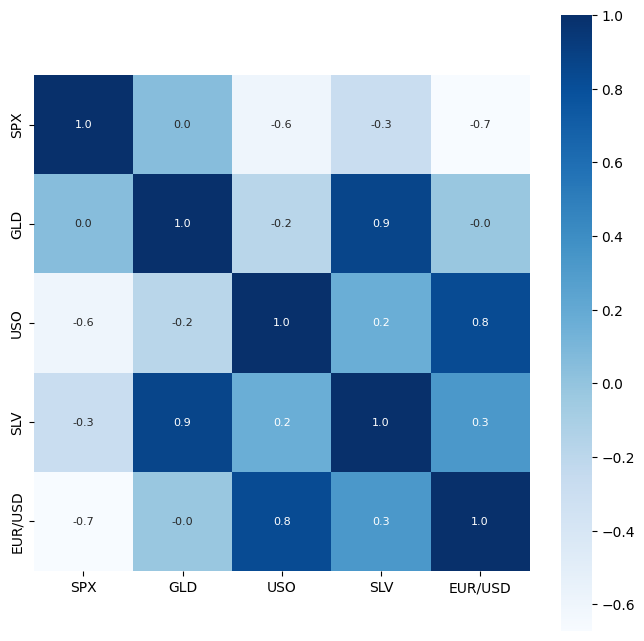

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Analisis:
- Harga emas (GLD) memiliki korelasi positif yang sangat kuat dengan harga perak (SLV), yang menunjukkan bahwa pergerakan harga emas cenderung sejalan dengan pergerakan harga perak.
- Indeks S&P 500 (SPX) memiliki korelasi negatif dengan harga minyak (USO) dan nilai tukar EUR/USD, menunjukkan bahwa ketika indeks S&P 500 naik, harga minyak dan nilai tukar EUR/USD cenderung turun, dan sebaliknya.
- Nilai tukar EUR/USD memiliki korelasi positif kuat dengan harga minyak (USO), menunjukkan hubungan yang signifikan antara nilai tukar ini dengan harga minyak.

C:\Users\Asus\AppData\Local\Temp\ipykernel_24164\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

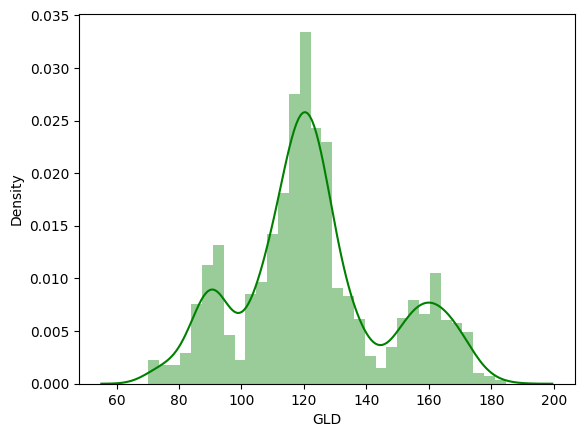

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')


Plot distribusi menunjukkan bahwa harga GLD (SPDR Gold Shares) dalam dataset memiliki distribusi yang tidak sepenuhnya simetris, dengan adanya variasi dalam data. Puncak utama terletak di sekitar 120, menunjukkan bahwa harga GLD paling sering berada di sekitar nilai ini. Namun, terdapat juga puncak kedua di sekitar 160, menunjukkan adanya dua kelompok utama dalam data. Rentang harga GLD berkisar dari sekitar 60 hingga 200. 

In [13]:
print(gold_data.columns)

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')


In [14]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
joblib.dump(regressor, 'main.sav')

['main.sav']

Model Evaluation

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.70669938  81.74630019 116.02620006 127.73260061 120.66670138
 154.73039761 150.40109857 126.2999     117.67089866 126.00810064
 116.83850076 172.60990048 141.94289934 167.83459851 115.20190021
 117.24730081 137.97960375 170.23890083 159.39390342 160.51489934
 155.09070029 125.09070066 175.88409905 157.12810321 125.15080042
  93.87989992  76.96070053 120.42609993 118.97699899 167.54589888
  88.31110056 125.18410019  91.01920046 117.6580002  121.07579885
 136.56049932 115.3403014  115.31930069 145.21799944 107.33120097
 104.0921024   87.29479818 126.4467006  117.93789997 153.64679885
 119.6674004  108.38609986 107.91999842  93.21530055 127.08479793
  74.4974008  113.51119909 121.52350029 111.26669915 118.88989902
 121.04469961 159.44499964 167.42120121 147.01589691  85.77259868
  94.14410059  86.73649865  90.64640041 119.04140054 126.46880091
 127.51880009 168.67119945 122.39589926 117.46679913  98.61690049
 168.44620078 142.69359749 131.92390205 121.08310218 121.45329928
 119.92570

In [51]:
# R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894381089176285


Compare the Actual Values and Predicted Values in a Plot

In [54]:
Y_test = list(Y_test)

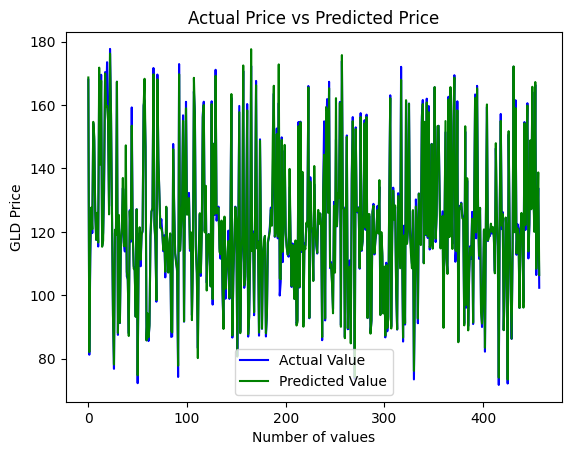

In [55]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()